In [7]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '../..')
import h5py
import networkx as nx
import matplotlib.pyplot as plt

In [8]:
from src import measurements as measure
from src import ket as ket
from src import density_matrix as DM

In [9]:
data = h5py.File("../../data/i_am_qenough/i_am_qenough.hdf5")

In [10]:
two_qubit_dms_example = data['8 qubits']['c5 connectivity']['unitary energy subspace None']['unitary seed 0']['ordering seed 1']['two_qubit_dms']

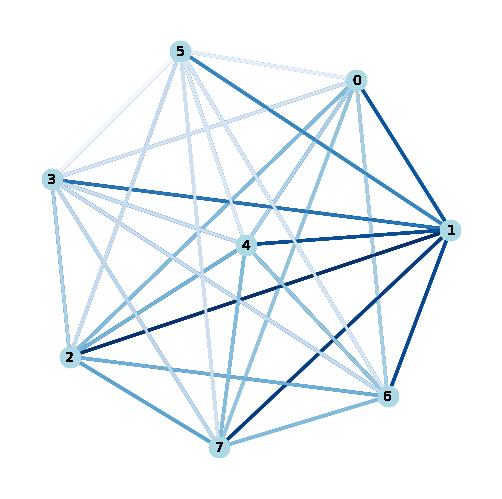

In [13]:
basis = ket.canonical_basis(2)

for time_index in two_qubit_dms_example:
    G = nx.Graph()
    processed_data = {}
    for key in two_qubit_dms_example[time_index]:
        processed_data[key] = DM.DensityMatrix(two_qubit_dms_example[time_index][key],basis)
    mutual_information = measure.mutual_information_of_every_pair_dict(processed_data)
    
    weighted_edges = []
    for key in mutual_information:
        mi = mutual_information[key]
        key = eval(key)
        
        G.add_edges_from([(key[0],key[1],{"mi":mi})])
        
    edges, weights = zip(*nx.get_edge_attributes(G, 'mi').items())

    # Normalize the weights to range [0, 1] for color mapping
    weights = [((w - min(weights)) / (max(weights) - min(weights))) for w in weights]
    
    pos = nx.spring_layout(G, seed=42)  # Define the layout for the nodes
    nx.draw(G,pos,with_labels=True, node_color='lightblue', node_size=200, font_size=10,edge_color=weights, edge_cmap=plt.cm.Blues, width=2)
    plt.gca().set_aspect('equal')
    plt.savefig(f"../../data/images/{time_index}.png")